In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp( -z ))

In [22]:
def propagate(x, y, w, b):
    m = y.size
    z = np.dot(w.T, x) + b
    a = sigmoid(z)
    cost = np.sum(-y*np.log(a)-((1-y)*np.log(1-a))) / m
    dw = np.dot((a - y), x.T) / m
    db = np.sum(a-y) / m
    grad = {'dw' : dw, 'db' : db}
    return cost, grad

In [23]:
def back_prop(x, y, w, b, lr=0.01, iters=2500):
    cst = []
    for i in range(iters):
        cost, params = propagate(x, y, w, b)
        cst.append(cost)
        dw = params['dw'].T
        db = params['db'].T
        w = w - lr*dw
        b = b - lr*db
        if i%100==0 or i==iters-1:
            print('Cost at %ith iteration : %f'%(i, cost))
    grads = {'w' : w, 'b' : b}
    return cst, grads

In [24]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [32]:
from sklearn.preprocessing import StandardScaler
# x = data.iloc[:, [2, 3]].values
# y = data.iloc[:, -1].values.reshape((1, -1))
sc = StandardScaler()
# x = sc.fit_transform(x).T
breast_cancer = load_breast_cancer()
data = breast_cancer.data
data = sc.fit_transform(data)
x = data.T
y = breast_cancer.target.reshape((1, -1))

In [33]:
x.shape, y.shape

((30, 569), (1, 569))

In [34]:
w = np.random.random((x.shape[0], 1))*0.01
b = 0.5326*0.01

In [35]:
w, b

(array([[0.00490736],
        [0.00822676],
        [0.00239321],
        [0.00049583],
        [0.00616396],
        [0.00157099],
        [0.00055943],
        [0.00668267],
        [0.0094242 ],
        [0.00033919],
        [0.00333381],
        [0.00705346],
        [0.00470333],
        [0.00673159],
        [0.00803981],
        [0.00117814],
        [0.00729482],
        [0.00353431],
        [0.00150146],
        [0.00120832],
        [0.00725056],
        [0.00202232],
        [0.00850016],
        [0.00250244],
        [0.00073161],
        [0.00060962],
        [0.00357788],
        [0.00157704],
        [0.00527366],
        [0.00273958]]),
 0.005326)

In [36]:
costs, grads = back_prop(x, y, w, b, lr = 0.1, iters=5000)

Cost at 0th iteration : 0.719580
Cost at 100th iteration : 0.102806
Cost at 200th iteration : 0.084574
Cost at 300th iteration : 0.076659
Cost at 400th iteration : 0.071956
Cost at 500th iteration : 0.068733
Cost at 600th iteration : 0.066338
Cost at 700th iteration : 0.064461
Cost at 800th iteration : 0.062937
Cost at 900th iteration : 0.061667
Cost at 1000th iteration : 0.060585
Cost at 1100th iteration : 0.059651
Cost at 1200th iteration : 0.058832
Cost at 1300th iteration : 0.058107
Cost at 1400th iteration : 0.057460
Cost at 1500th iteration : 0.056877
Cost at 1600th iteration : 0.056349
Cost at 1700th iteration : 0.055867
Cost at 1800th iteration : 0.055426
Cost at 1900th iteration : 0.055019
Cost at 2000th iteration : 0.054644
Cost at 2100th iteration : 0.054295
Cost at 2200th iteration : 0.053970
Cost at 2300th iteration : 0.053667
Cost at 2400th iteration : 0.053382
Cost at 2500th iteration : 0.053114
Cost at 2600th iteration : 0.052862
Cost at 2700th iteration : 0.052624
Cost

In [37]:
grads

{'w': array([[-0.44528105],
        [-0.510195  ],
        [-0.42152901],
        [-0.54871992],
        [-0.1930897 ],
        [ 0.72147998],
        [-0.9990588 ],
        [-1.10875456],
        [ 0.16299877],
        [ 0.42639934],
        [-1.64015341],
        [ 0.30364984],
        [-0.944178  ],
        [-1.23604295],
        [-0.32850552],
        [ 1.05742159],
        [ 0.02879407],
        [-0.39535022],
        [ 0.39667916],
        [ 0.8717584 ],
        [-1.2421198 ],
        [-1.58142826],
        [-1.00413206],
        [-1.21865991],
        [-0.94493194],
        [ 0.05929428],
        [-1.12883114],
        [-1.19932796],
        [-1.16560535],
        [-0.56482551]]),
 'b': 0.151923557588279}

Text(0, 0.5, 'Cost')

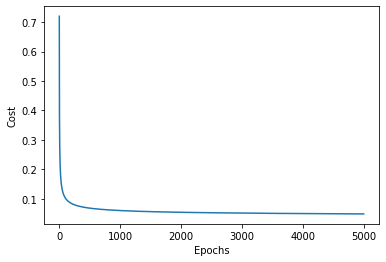

In [45]:
plt.plot(costs) # Gradient Descent 
plt.xlabel('Epochs')
plt.ylabel('Cost')

In [46]:
a = sigmoid(np.dot(grads['w'].T, x)+grads['b'])

In [47]:
preds = np.where(a>=.5, 1, 0)

In [48]:
preds

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [49]:
y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [50]:
v = 1*(y==preds)

In [51]:
(np.sum(v)/v.size)*100 # Accuracy

98.76977152899823